# 用神经网络来学习XOR函数迭代版

In [ ]:
import numpy as np  # Note: there is a typo on this line in the video

[ 2.17    2.1701  2.1702  2.1703  2.1704  2.1705  2.1706  2.1707  2.1708
  2.1709  2.171   2.1711  2.1712  2.1713  2.1714  2.1715  2.1716  2.1717
  2.1718  2.1719  2.172   2.1721  2.1722  2.1723  2.1724  2.1725  2.1726
  2.1727  2.1728  2.1729  2.173   2.1731  2.1732  2.1733  2.1734  2.1735
  2.1736  2.1737  2.1738  2.1739  2.174   2.1741  2.1742  2.1743  2.1744
  2.1745  2.1746  2.1747  2.1748  2.1749  2.175   2.1751  2.1752  2.1753
  2.1754  2.1755  2.1756  2.1757  2.1758  2.1759  2.176   2.1761  2.1762
  2.1763  2.1764  2.1765  2.1766  2.1767  2.1768  2.1769  2.177   2.1771
  2.1772  2.1773  2.1774  2.1775  2.1776  2.1777  2.1778  2.1779  2.178
  2.1781  2.1782  2.1783  2.1784  2.1785  2.1786  2.1787  2.1788  2.1789
  2.179   2.1791  2.1792  2.1793  2.1794  2.1795  2.1796  2.1797  2.1798
  2.1799  2.18    2.1801  2.1802  2.1803  2.1804  2.1805  2.1806  2.1807
  2.1808  2.1809  2.181   2.1811  2.1812  2.1813  2.1814  2.1815  2.1816
  2.1817  2.1818  2.1819  2.182   2.1821  2.1822  2.

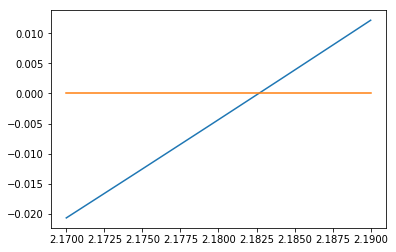

x,y,y1,yh
0.5
-0.0252551286084
2.1824
-0.00040199032178


In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(2.17,2.19,0.0001)

y=x*x+np.sqrt(x+1)-3*x

y0=(x+x)*0

print(x,y)

plt.plot(x,y)
plt.plot(x,y0)

plt.show()

print("x,y,y1,yh")


x=0.5
print(x)
yl=x*x+np.sqrt(x+1)-3*x
print(yl)

x=2.1824
print(x)
yh=x*x+np.sqrt(x+1)-3*x
print(yh)




# 首先，定义一个sigmod函数

In [26]:
def nonlin(x, deriv=False):  # Note: there is a typo on this line in the video
    if(deriv==True):
        return (x*(1-x))
    
    return 1/(1+np.exp(-x))  # Note: there is a typo on this line in the video

[  4.53978687e-05   3.35350130e-04   2.47262316e-03   1.79862100e-02
   1.19202922e-01   5.00000000e-01   8.80797078e-01   9.82013790e-01
   9.97527377e-01   9.99664650e-01]


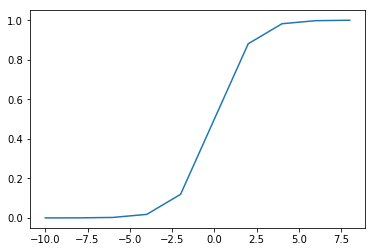

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(-10,10,2)
y=nonlin(x)
print(y)
plt.plot(x,y)
plt.show()


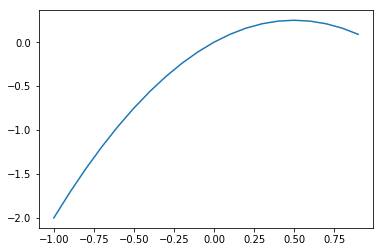

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(-1,1,0.1)
yderiv=nonlin(x,deriv=True)
plt.plot(x,yderiv)
plt.show()


# 复习一下表格试凑法

![](weights_solution.png)

In [29]:
syn0=np.array([[-10,-20,20,20],
              [-10,20,-20,20],
              [10,0.2,-1,-20]])
print(syn0)

syn1=np.array([[0],
              [1],
              [1],
              [0]])


[[-10.  -20.   20.   20. ]
 [-10.   20.  -20.   20. ]
 [ 10.    0.2  -1.  -20. ]]


# 所有可能的输入值放在一个向量中

In [30]:
#input data
xinputs = np.array([[0,0,1], 
            [0,1,1],
            [1,0,1],
            [1,1,1]])


# 计算第一层的线性输出


In [31]:
SO1=np.dot(xinputs,syn0)
print(SO1)

[[ 10.    0.2  -1.  -20. ]
 [  0.   20.2 -21.    0. ]
 [  0.  -19.8  19.    0. ]
 [-10.    0.2  -1.   20. ]]


The output of the exclusive OR function follows. 

In [36]:
SS1=nonlin(SO1)
print(SS1)

[[  9.99954602e-01   5.49833997e-01   2.68941421e-01   2.06115362e-09]
 [  5.00000000e-01   9.99999998e-01   7.58256042e-10   5.00000000e-01]
 [  5.00000000e-01   2.51749871e-09   9.99999994e-01   5.00000000e-01]
 [  4.53978687e-05   5.49833997e-01   2.68941421e-01   9.99999998e-01]]


In [37]:
SO2=np.dot(SS1,syn1)
print(SO2)

[[ 0.81877542]
 [ 1.        ]
 [ 1.        ]
 [ 0.81877542]]


In [39]:
output=nonlin(SO2)
print(output)

[[ 0.69397633]
 [ 0.73105858]
 [ 0.73105858]
 [ 0.69397633]]


# 监督学习的输出结果

In [31]:
#output data
y = np.array([[0],
             [1],
             [1],
             [0]])

The seed for the random generator is set so that it will return the same random numbers each time, which is sometimes useful for debugging.

In [32]:
np.random.seed(1)

In [21]:
#synapses
syn0 = 2*np.random.random((3,4)) - 1  # 3x4 matrix of weights ((2 inputs + 1 bias) x 4 nodes in the hidden layer)
syn1 = 2*np.random.random((4,1)) - 1  # 4x1 matrix of weights. (4 nodes x 1 output) - no bias term in the hidden layer.

![](BPBSYN0SYN1.png)

This is the main training loop. The output shows the evolution of the error between the model and desired. The error steadily decreases. 

# 第一步
随机选定权值，看看输出

#第一层
4个神经元
每个神经元针对3个输入各有一套3权值随机生成。 

In [22]:
print(syn0)
print(syn1)

[[-0.16595599  0.44064899 -0.99977125 -0.39533485]
 [-0.70648822 -0.81532281 -0.62747958 -0.30887855]
 [-0.20646505  0.07763347 -0.16161097  0.370439  ]]
[[-0.5910955 ]
 [ 0.75623487]
 [-0.94522481]
 [ 0.34093502]]


# 用第一个数据计算目前的输出,也就是 0，0，1的情况

In [24]:
print(xinputs[0])

[0 0 1]


先算第一层第一个神经元接受到的输入，权值如下

In [85]:
print(syn0[:,0])

[-0.16595599 -0.70648822 -0.20646505]


In [29]:
s1=np.dot(xinputs[0],syn0[:,0])
print(s1)

-0.206465051539


In [30]:
l1=nonlin(s1)
print(l1)

0.448566316246


# 这样得出了第一层第一个神经元在输入为0 0 偏置为1时的输出

# 作业：求出s2,s3,s4

# 作业：用你昨天的值初始化syn0,syn1

# 同理得出第一层第二个

In [93]:
w1=sum(X[0]*syn0[:,1])
l1=nonlin(w1)
print(l1)

0.519398625093


# 可以一次性利用numpy里的点积（dot）计算，也就是加权求和计算，得出第一层4个神经元在输入为0，0，偏置为1时的值

In [96]:
l1=nonlin(np.dot(X[0],syn0))
print(l1)

[ 0.44856632  0.51939863  0.45968497  0.59156505]


# 然后计算第二层的输出

In [98]:
l2=nonlin(np.dot(l1,syn1))
print(l2)

[ 0.47372957]


# 我们期待的输出值是多少呢？

In [99]:
print(y[0])

[0]


# 误差是

In [101]:
l2_error=y[0]-l2
print(l2_error)

[-0.47372957]


# 利用误差修正第二层权值网络

In [105]:
l2_delta = l2_error*nonlin(l2, deriv=True)

In [106]:
print(l2_delta)

[[-0.00064963]
 [ 0.00081722]
 [ 0.00074366]
 [-0.00096423]]


# 计算第一层的误差

In [119]:
l1_error = l2_delta.dot(syn1.T)
print(l1_error)

[[ 0.000384   -0.00049128  0.00061405 -0.00022148]
 [-0.00048305  0.00061801 -0.00077245  0.00027862]
 [-0.00043958  0.00056238 -0.00070293  0.00025354]
 [ 0.00056995 -0.00072918  0.00091141 -0.00032874]]


# 计算第一层的修正值

In [121]:
l1_delta = l1_error * nonlin(l1,deriv=True)
print(l1_delta)

[[  9.49829336e-05  -1.22633883e-04   1.52514256e-04  -5.35137018e-05]
 [ -1.19485307e-04   1.54269263e-04  -1.91857758e-04   6.73184206e-05]
 [ -1.08731309e-04   1.40384616e-04  -1.74590045e-04   6.12595822e-05]
 [  1.40980109e-04  -1.82021523e-04   2.26371999e-04  -7.94286640e-05]]


# 修正权值网络

In [122]:
syn1 += l1.T.dot(l2_delta)
syn0 += l0.T.dot(l1_delta)    

In [123]:
print(syn0)
print(syn1)

[[-0.16592374  0.44060735 -0.99971947 -0.39535302]
 [-0.70646672 -0.81535056 -0.62744506 -0.30889066]
 [-0.20645731  0.07762347 -0.16159853  0.37043464]]
[[-0.591191  ]
 [ 0.75613938]
 [-0.94532031]
 [ 0.34083952]]


# 作业：验算一下权值网络修正过的输入输出

In [ ]:
#put your code here

# 练习：计算一下输入为0 1时的输出以及误差，偏置选1 ....

In [8]:
#training step
# Python2 Note: In the follow command, you may improve 
#   performance by replacing 'range' with 'xrange'. 
for j in range(60000):  
    
    # Calculate forward through the network.
    l0 = X
    l1 = nonlin(np.dot(l0, syn0))
    l2 = nonlin(np.dot(l1, syn1))
    
    # Back propagation of errors using the chain rule. 
    l2_error = y - l2
    if(j % 10000) == 0:   # Only print the error every 10000 steps, to save time and limit the amount of output. 
        print("Error: " + str(np.mean(np.abs(l2_error))))
        
    l2_delta = l2_error*nonlin(l2, deriv=True)
    
    l1_error = l2_delta.dot(syn1.T)
    
    l1_delta = l1_error * nonlin(l1,deriv=True)
    
    #update weights (no learning rate term)
    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)
    
print("Output after training")
print(l2)
    
    

Error: 0.496410031903
Error: 0.00858452565325
Error: 0.00578945986251
Error: 0.00462917677677
Error: 0.00395876528027
Error: 0.00351012256786
Output after training
[[ 0.00260572]
 [ 0.99672209]
 [ 0.99701711]
 [ 0.00386759]]


In [ ]:
l2 = nonlin(np.dot(l1, syn1))
    

# 求 0 XOR 0 
0,0,偏置1

See how the final output closely approximates the true output [0, 1, 1, 0]. If you increase the number of interations in the training loop (currently 60000), the final output will be even closer. 

In [61]:
#X[0]=np.array([0,0,1])
print(X[0])

[0 1]


In [1]:
%%HTML
#The following line is for embedding the YouTube video 
#   in this Jupyter Notebook. You may remove it without peril. 
<iframe width="560" height="315" src="https://www.youtube.com/embed/h3l4qz76JhQ" frameborder="0" allowfullscreen></iframe>